<a href="https://colab.research.google.com/github/mateosuster/pythonungs/blob/master/codigos/MPE_III_Intro_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

* [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) es una biblioteca de código abierto que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar para el lenguaje de programación Python. Es una de las librerías más usadas para este tipo de tareas.

* Nombre derivado de "**Pan**el **Da**ta **S**ystem" (término econométrico para datasets multidimensionales).

* Su funcionalidad permite hacer operaciones sobre datos que se encuentran en memoria de manera eficiente. Combina la alta performance de las operaciones sobre arrays de NumPy con la flexibilidad en la manipulación datasets (Excel, CSV, Google Spreadsheets, etc., etc.) o una base de datos relacional (SQL).


In [3]:
#Como buena práctica, iniciamos importando las librerías
import pandas as pd
import numpy as np

## Exploración

Vamos a analizar datos de una fuente real. Los ingresos de los funcionarios son información pública que se libera anualmente en el <a href='https://data.buenosaires.gob.ar/dataset/sueldo-funcionarios'>portal de datos abiertos</a> de GCBA.  

En general los 4 primeros pasos para analizar un data set son:
1. Leerlo
2. Consultar cuáles son las columnas
3. Extraer una muestra
4. Verificar cuántos registros tiene


### 1- Para leer el data set usamos la función de pandas `read_csv()`


Con esta función podemos leer archivos que estén en una url pública o en una ubicación del disco accesible desde la Jupyter Notebook. 

In [2]:
df = pd.read_csv('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/sueldo-funcionarios/sueldo_funcionarios_2019.csv')

### 2- Consultamos las columnas


In [3]:
df.columns

Index(['cuil', 'anio', 'mes', 'funcionario_apellido', 'funcionario_nombre',
       'reparticion', 'asignacion_por_cargo_i', 'aguinaldo_ii',
       'total_salario_bruto_i_+_ii', 'observaciones'],
      dtype='object')

### 3- Extraemos una muestra

In [5]:
df.sample(5)

,cuil,anio,mes,funcionario_apellido,funcionario_nombre,reparticion,asignacion_por_cargo_i,aguinaldo_ii,total_salario_bruto_i_+_ii,observaciones
57,20-22709722-2,2019,2,LOPEZ,MATIAS,SECR Desarrollo Ciudadano,204017.27,0.00,204017.27,NaN
339,27-26690980-8,2019,11,UHALDE,MARIA PAULA,SECR Cultura Ciudadana y Función Pública,249972.87,0.00,249972.87,NaN
240,27-30744939-6,2019,8,FERRERO,GENOVEVA,SECR Administración de Seguridad y Emergencias,239470.36,0.00,239470.36,NaN
88,20-22709722-2,2019,3,LOPEZ,MATIAS,SECR Desarrollo Ciudadano,210061.14,0.00,210061.14,NaN
177,20-22293622-6,2019,6,FERNANDEZ,DIEGO HERNAN,SECR Integración Social y Urbana,226866.41,113433.21,340299.62,NaN


### 4- Consultamos la cantidad de filas y de columnas

In [6]:
# La propiedad shape nos devuelve una tupla (filas,columnas)
df.shape

(385, 10)

## Vectorización en Pandas
Pandas es útil para trabajar sobre datos tabulares, con dos condiciones importantes:

I. Los datos se encuentran enteramente en la memoria RAM. Con lo cual, el tamaño de los datos que podemos manipular está limitado por el hardware. Como regla de pulgar, es una buena práctica no ocupar más de 1/3 de la memoria RAM de nuestro dispositivo con el dataset. Así, si estamos trabajando localmente en una notebook con 8GB de memoria RAM no es recomendable procesar datasets de más de 2.33GB.

II. En pandas, las operaciones sobre filas y columnas son, en general, eficientes porque se hacen de forma "vectorizada". En realidad esta optimización, se hace desde numpy, una librería para realizar operaciones matemáticas que se utilizó a su vez para escribir pandas. 

Las operaciones vectorizadas son las que se realizan en bloque en vez de caso por caso. Las computadoras de hoy tienen la capacidad de recibir muchas instrucciones juntas y procesar varias de ellas a la vez. Por ejemplo, si nuestro hardware tiene la capacidad de procesar 4 operaciones juntas, el resultado de vectorizar una operación matemática es el siguiente:

<img src = 'https://datasets-humai.s3.amazonaws.com/images/vectorizacion.png' /> 


En el primer caso hay que hacer 5 operaciones y en el segundo caso sólo dos.

Es importante entender, entonces, que Pandas trabaja de esta manera y que por eso es una de las herramientas más elegidas para manipular datos en memoria.

## Los objetos fundamentales de Pandas

### Series

Las *Series* son un vector unidimensional, el objeto "más simple" que encontramos en Pandas. En el fondo, podemos pensar a las series como "columnas" de una tabla que están asociadas a un índice y a un nombre. Igual que una lista común de Python es una secuencia de elementos ordenados, pero a diferencia de la lista está asociada a más información.

In [7]:
# Las series se pueden crear a partir de una lista
serie = pd.Series(['a','b','c'])

In [8]:
# Propiedades importantes de las series
print('Tipo de objetos que tiene ', serie.dtype)
print('Nombre ', serie.name)
print('Index ',serie.index)
print('Valores ',serie.values)


Tipo de objetos que tiene  object
Nombre  None
Index  RangeIndex(start=0, stop=3, step=1)
Valores  ['a' 'b' 'c']


### DataFrame 

El principal objeto en Pandas son los DataFrames, los cuales son una estructura de datos tabular (o simplemente "tablas"), compuestas por una colección de "columnas" o series que **comparten todas un mismo índice**. Cada columna puede poseer un tipo de determinado de dato distinto (number, string, boolean, etc.).  

Los DataFrames tienen un objeto Index que describe los nombres de columnas y otro objeto Index que describen los nombres de las filas.

En general los DataFrames se crean a partir de leer tablas de archivos (pueden ser en formato json, csv o incluso xlsx) pero a veces también se crean a partir de listas de diccionarios o de otras maneras. Veamos algunas de ellas.

<br>

* Diccionario con listas:
<br>

```
{Nombre columna: [Valores]}
```

In [9]:
name_age = {'Name' : ['Ali', 'Bill', 'David', 'Hany', 'Ibtisam'], 'Age' : [32, 55, 20, 43, 30]}
print("name_age es", type(name_age))
print(name_age)

name_age es <class 'dict'>
{'Name': ['Ali', 'Bill', 'David', 'Hany', 'Ibtisam'], 'Age': [32, 55, 20, 43, 30]}


In [10]:
data_frame = pd.DataFrame(name_age)
print("data_frame es", type(data_frame))
data_frame.head(4)

data_frame es <class 'pandas.core.frame.DataFrame'>


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43


* Lista de Diccionarios: 
<br>

```
[{Columna1: valor, Columna2: valor}, 
{Columna1: valor, Columna2: valor}]
```

Cada elemento de la lista corresponde a una fila

In [11]:
name_age = [{'Name': 'Ali','Age':32},
            {'Name': 'Bill','Age':55},
            {'Name': 'David','Age':20},
            {'Name': 'Hany','Age':43},
            {'Name': 'Ibtisam','Age':30}]

print("name_age es", type(name_age))
print(name_age)

name_age es <class 'list'>
[{'Name': 'Ali', 'Age': 32}, {'Name': 'Bill', 'Age': 55}, {'Name': 'David', 'Age': 20}, {'Name': 'Hany', 'Age': 43}, {'Name': 'Ibtisam', 'Age': 30}]


In [12]:
data_frame = pd.DataFrame(name_age)
print("data_frame es", type(data_frame))
data_frame

data_frame es <class 'pandas.core.frame.DataFrame'>


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43
4,Ibtisam,30


* Lista de listas: 

<br>
[  [valor<sub>11</sub>, valor<sub>12</sub>],
<br>
[valor<sub>21</sub>, valor<sub>22</sub>], 
<br>...<br>
[valor<sub>n1</sub>, valor<sub>n2</sub>] ] 
<br>
<br>
  Cada lista de la superlista corresponde a una fila u observación

In [1]:
name_age = [ ['Ali',32], ['Bill',55],
            ['David', 20], ['Hany',43],
            ['Ibtisam',30]  ]

print("name_age es", type(name_age))
print(name_age)

name_age es <class 'list'>
[['Ali', 32], ['Bill', 55], ['David', 20], ['Hany', 43], ['Ibtisam', 30]]


In [4]:
data_frame = pd.DataFrame(name_age, columns = ["Name", "Age"]) #con columns especificamos los nombres de columnas
print("data_frame es", type(data_frame))
data_frame

data_frame es <class 'pandas.core.frame.DataFrame'>


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43
4,Ibtisam,30


#### Selección de columnas

Hay dos alternativas para seleccionar columnas de un DataFrame

In [5]:
data_frame["Name"]

0        Ali
1       Bill
2      David
3       Hany
4    Ibtisam
Name: Name, dtype: object

In [6]:
data_frame.Name

0        Ali
1       Bill
2      David
3       Hany
4    Ibtisam
Name: Name, dtype: object

Esta última forma es menos utilizada, pero también es una sintaxis válida. Ambas sentencias producen el mismo resultado de tipo series

In [7]:
type(data_frame["Name"])

pandas.core.series.Series

## Lectura de archivos

Otra manera de crear dataframes, es leyendo archivos con datos, en lugar de armarlos nosotros *a mano*. La librería pandas permite abrir y guardar los [dataframes en muchos formatos distintos](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) 

### Carga de Archivos

Lo primero que debemos resolver es cómo subir archivos a Google Colab. Veamos un ejemplo con los datos de [cotizaciones del dólar](https://datos.gob.ar/ru/dataset/sspm-tipo-cambio--usd---futuro-dolar). Existen múltiples maneras:

* Si tenemos una url, podemos descargarla directamente a Colab de la siguiente manera:



In [15]:
# Descargamos un dataset público
!wget https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv

--2022-05-13 23:11:43--  https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv
Resolving infra.datos.gob.ar (infra.datos.gob.ar)... 186.33.215.176
Connecting to infra.datos.gob.ar (infra.datos.gob.ar)|186.33.215.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 808585 (790K) [text/csv]
Saving to: ‘datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv’

datos-tipo-cambio-u 100%[===================>] 789.63K   946KB/s    in 0.8s    

2022-05-13 23:11:45 (946 KB/s) - ‘datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv’ saved [808585/808585]



* Otra opción es subir el archivo manualmente:

In [16]:
from google.colab import files

uploaded=files.upload()

* Por último, es posible acceder a Google Drive en colab:

In [17]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Una vez que tenemos el archivo que queremos en colab, podemos abrirlo con la función **read_csv**

In [32]:
dolar_df = pd.read_csv("/content/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv")
dolar_df

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7357,2022-04-26,119.75,114.8417,114.85,NaN,214.881623,115.30,2173037.0,121.00,740809.0,127.10,261824.0,133.00,192843.0,139.50,52932.0,145.50,60372.0
7358,2022-04-27,119.75,115.0050,115.04,NaN,208.698031,115.28,2141382.0,121.00,944708.0,127.14,312879.0,133.41,217803.0,140.38,66187.0,146.40,65231.0
7359,2022-04-28,119.75,115.1733,115.18,NaN,205.172414,115.30,1839555.0,120.96,1315908.0,127.18,350398.0,133.62,224907.0,140.80,66573.0,147.20,63426.0
7360,2022-04-29,120.25,115.3117,115.31,NaN,204.730473,115.31,1839555.0,120.73,2465967.0,127.05,361946.0,133.70,243283.0,141.30,63043.0,147.55,62675.0


Recuerden que también podemos leer el dataframe introduciendo el URL de descarga en la función `read_csv()`, tal como hicimos al principio. El siguiente bloque de código, que es un ejemplo de ello, tiene el mismo efecto que el anterior.



In [21]:
# dolar_df = pd.read_csv("https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv")
# dolar_df

Repasemos algunas propiedades importantes de los dataframes.

In [26]:
print('Columnas ', dolar_df.columns, end = "\n\n")
print('Index ', dolar_df.index, end = "\n\n")
print('Dimensiones ',dolar_df.shape, end = "\n\n")

Columnas  Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m'],
      dtype='object')

Index  RangeIndex(start=0, stop=7362, step=1)

Dimensiones  (7362, 18)



In [28]:
# Consultar las primeras filas
dolar_df.head()

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Si queremos extraer una serie del DataFrame, podemos hacerlo de la misma forma en que extraemos un valor de un diccionario.



In [29]:
serie_fecha = dolar_df['indice_tiempo']

type(serie_fecha)

pandas.core.series.Series

Podemos explorar los datos del dataset con los [graficos de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

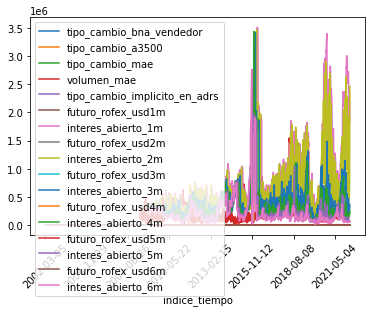

In [33]:
dolar_df.set_index(keys = "indice_tiempo", inplace=True) #definimos un indice de manera "inplace"
dolar_df.plot(rot = 45 )

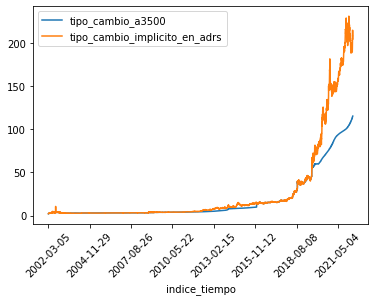

In [36]:
dolar_df= dolar_df[[ "tipo_cambio_a3500",  "tipo_cambio_implicito_en_adrs"]]
dolar_df.plot(rot = 45 )